# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

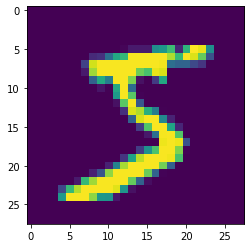

Label:  5


In [3]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

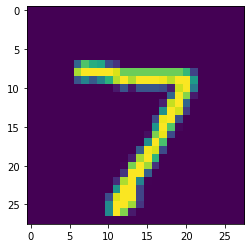

Label:  7


In [4]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [7]:
X_train.shape

(60000, 784)

In [8]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [9]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


## Basic MLP model
- Naive MLP model without any alterations

In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [38]:
model = Sequential()

In [39]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [40]:
sgd = optimizers.SGD(lr = 0.01)
adam=optimizers.SGD(lr=0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [41]:
history = model.fit(X_train, y_train, batch_size = 64, validation_split = 0.3, epochs = 100, verbose = 1)

Train on 13860 samples, validate on 5940 samples
Epoch 1/100
13860/13860 [==============================] - 0s 35us/step - loss: 2.3119 - accuracy: 0.1118 - val_loss: 2.3009 - val_accuracy: 0.1118
Epoch 2/100
13860/13860 [==============================] - 0s 27us/step - loss: 2.2994 - accuracy: 0.1150 - val_loss: 2.2999 - val_accuracy: 0.1118
Epoch 3/100
13860/13860 [==============================] - 0s 27us/step - loss: 2.2985 - accuracy: 0.1143 - val_loss: 2.2992 - val_accuracy: 0.1118
Epoch 4/100
13860/13860 [==============================] - 0s 27us/step - loss: 2.2976 - accuracy: 0.1143 - val_loss: 2.2984 - val_accuracy: 0.1118
Epoch 5/100
13860/13860 [==============================] - 0s 28us/step - loss: 2.2966 - accuracy: 0.1145 - val_loss: 2.2966 - val_accuracy: 0.1118
Epoch 6/100
13860/13860 [==============================] - 0s 27us/step - loss: 2.2956 - accuracy: 0.1143 - val_loss: 2.2963 - val_accuracy: 0.1118
Epoch 7/100
13860/13860 [==============================] - 0s 2

Epoch 56/100
13860/13860 [==============================] - 0s 27us/step - loss: 1.2461 - accuracy: 0.6540 - val_loss: 1.2528 - val_accuracy: 0.6593
Epoch 57/100
13860/13860 [==============================] - 0s 26us/step - loss: 1.2087 - accuracy: 0.6667 - val_loss: 1.2196 - val_accuracy: 0.6567
Epoch 58/100
13860/13860 [==============================] - 0s 26us/step - loss: 1.1747 - accuracy: 0.6834 - val_loss: 1.1843 - val_accuracy: 0.6626
Epoch 59/100
13860/13860 [==============================] - 0s 26us/step - loss: 1.1408 - accuracy: 0.6954 - val_loss: 1.1536 - val_accuracy: 0.6975
Epoch 60/100
13860/13860 [==============================] - 0s 35us/step - loss: 1.1099 - accuracy: 0.7119 - val_loss: 1.1250 - val_accuracy: 0.6914
Epoch 61/100
13860/13860 [==============================] - 0s 30us/step - loss: 1.0846 - accuracy: 0.7196 - val_loss: 1.1056 - val_accuracy: 0.7079
Epoch 62/100
13860/13860 [==============================] - 0s 32us/step - loss: 1.0583 - accuracy: 0.7298

In [42]:
history.history.keys

<function dict.keys>

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

KeyError: 'acc'

Training and validation accuracy seems to improve after around 60 epochs

In [44]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 21us/step


In [45]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8671000003814697


## 1. Weight Initialization
- Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

In [57]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [58]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 64, validation_split = 0.3, epochs = 100, verbose = 1)

Train on 13860 samples, validate on 5940 samples
Epoch 1/100
13860/13860 [==============================] - 1s 42us/step - loss: 2.3256 - accuracy: 0.1071 - val_loss: 2.2988 - val_accuracy: 0.1153
Epoch 2/100
13860/13860 [==============================] - 0s 30us/step - loss: 2.2938 - accuracy: 0.1217 - val_loss: 2.2915 - val_accuracy: 0.1118
Epoch 3/100
13860/13860 [==============================] - 0s 30us/step - loss: 2.2865 - accuracy: 0.1184 - val_loss: 2.2840 - val_accuracy: 0.1118
Epoch 4/100
13860/13860 [==============================] - 0s 31us/step - loss: 2.2796 - accuracy: 0.1317 - val_loss: 2.2770 - val_accuracy: 0.1152
Epoch 5/100
13860/13860 [==============================] - 0s 31us/step - loss: 2.2729 - accuracy: 0.1504 - val_loss: 2.2709 - val_accuracy: 0.1202
Epoch 6/100
13860/13860 [==============================] - 0s 30us/step - loss: 2.2661 - accuracy: 0.1426 - val_loss: 2.2633 - val_accuracy: 0.2574
Epoch 7/100
13860/13860 [==============================] - 0s 3

Epoch 56/100
13860/13860 [==============================] - 0s 35us/step - loss: 0.5526 - accuracy: 0.8855 - val_loss: 0.5873 - val_accuracy: 0.8604
Epoch 57/100
13860/13860 [==============================] - 0s 30us/step - loss: 0.5506 - accuracy: 0.8820 - val_loss: 0.5845 - val_accuracy: 0.8631
Epoch 58/100
13860/13860 [==============================] - 0s 30us/step - loss: 0.5373 - accuracy: 0.8810 - val_loss: 0.5770 - val_accuracy: 0.8582
Epoch 59/100
13860/13860 [==============================] - 0s 36us/step - loss: 0.5313 - accuracy: 0.8806 - val_loss: 0.5629 - val_accuracy: 0.8636
Epoch 60/100
13860/13860 [==============================] - 0s 33us/step - loss: 0.5237 - accuracy: 0.8818 - val_loss: 0.5643 - val_accuracy: 0.8657
Epoch 61/100
13860/13860 [==============================] - 0s 30us/step - loss: 0.5147 - accuracy: 0.8869 - val_loss: 0.5365 - val_accuracy: 0.8736
Epoch 62/100
13860/13860 [==============================] - 0s 30us/step - loss: 0.5020 - accuracy: 0.8895

In [48]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

KeyError: 'acc'

Training and validation accuracy seems to improve after around 60 epochs

In [59]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 24us/step


In [60]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8981000185012817


## 2. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 400px"/>
<center> **Sigmoid Activation Function** </center>
<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 400px"/>
<center> **Relu Activation Function** </center>

In [66]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [67]:
model = mlp_model()
history = model.fit(X_train, y_train,batch_size = 64, validation_split = 0.3, epochs = 100, verbose = 1)

Train on 13860 samples, validate on 5940 samples
Epoch 1/100
13860/13860 [==============================] - 1s 49us/step - loss: 2.5461 - accuracy: 0.5395 - val_loss: 1.1341 - val_accuracy: 0.6715
Epoch 2/100
13860/13860 [==============================] - 0s 31us/step - loss: 0.8790 - accuracy: 0.7402 - val_loss: 0.8195 - val_accuracy: 0.7576
Epoch 3/100
13860/13860 [==============================] - 0s 33us/step - loss: 0.6594 - accuracy: 0.8012 - val_loss: 0.6751 - val_accuracy: 0.8056
Epoch 4/100
13860/13860 [==============================] - 0s 34us/step - loss: 0.5510 - accuracy: 0.8368 - val_loss: 0.6120 - val_accuracy: 0.8236
Epoch 5/100
13860/13860 [==============================] - 0s 33us/step - loss: 0.4807 - accuracy: 0.8538 - val_loss: 0.5490 - val_accuracy: 0.8458
Epoch 6/100
13860/13860 [==============================] - 1s 42us/step - loss: 0.4300 - accuracy: 0.8699 - val_loss: 0.5146 - val_accuracy: 0.8549
Epoch 7/100
13860/13860 [==============================] - 0s 3

Epoch 56/100
13860/13860 [==============================] - ETA: 0s - loss: 0.0729 - accuracy: 0.98 - 0s 29us/step - loss: 0.0728 - accuracy: 0.9800 - val_loss: 0.3869 - val_accuracy: 0.9128
Epoch 57/100
13860/13860 [==============================] - 0s 30us/step - loss: 0.0711 - accuracy: 0.9812 - val_loss: 0.3896 - val_accuracy: 0.9101
Epoch 58/100
13860/13860 [==============================] - 0s 29us/step - loss: 0.0693 - accuracy: 0.9815 - val_loss: 0.3880 - val_accuracy: 0.9136
Epoch 59/100
13860/13860 [==============================] - 0s 28us/step - loss: 0.0678 - accuracy: 0.9815 - val_loss: 0.3830 - val_accuracy: 0.9114
Epoch 60/100
13860/13860 [==============================] - 0s 34us/step - loss: 0.0666 - accuracy: 0.9828 - val_loss: 0.3843 - val_accuracy: 0.9148
Epoch 61/100
13860/13860 [==============================] - 1s 42us/step - loss: 0.0644 - accuracy: 0.9828 - val_loss: 0.3829 - val_accuracy: 0.9145
Epoch 62/100
13860/13860 [==============================] - 0s 3

In [73]:
history.history.keys

<function dict.keys>

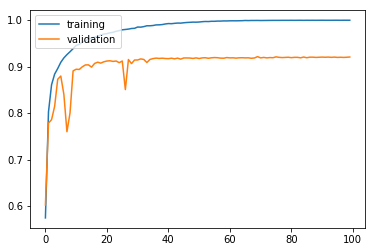

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [0]:
results = model.evaluate(X_test, y_test)

 9376/10000 [===========================>..] - ETA: 0s

In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9208


## 3. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)


<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>


#### Batch gradient descent  ## taking entire data at once
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x03B8;<!-- θ --></mi>
  <mo>=</mo>
  <mi>&#x03B8;<!-- θ --></mi>
  <mo>&#x2212;<!-- − --></mo>
  <mi>&#x03B7;<!-- η --></mi>
  <mo>&#x22C5;<!-- ⋅ --></mo>
  <msub>
    <mi mathvariant="normal">&#x2207;<!-- ∇ --></mi>
    <mi>&#x03B8;<!-- θ --></mi>
  </msub>
  <mi>J</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x03B8;<!-- θ --></mi>
  <mo stretchy="false">)</mo>
</math>


#### Stochastic gradient descent ## taking one row at a time ( one record at a time)
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x03B8;<!-- θ --></mi>
  <mo>=</mo>
  <mi>&#x03B8;<!-- θ --></mi>
  <mo>&#x2212;<!-- − --></mo>
  <mi>&#x03B7;<!-- η --></mi>
  <mo>&#x22C5;<!-- ⋅ --></mo>
  <msub>
    <mi mathvariant="normal">&#x2207;<!-- ∇ --></mi>
    <mi>&#x03B8;<!-- θ --></mi>
  </msub>
  <mi>J</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x03B8;<!-- θ --></mi>
  <mo>;</mo>
  <msup>
    <mi>x</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mo stretchy="false">(</mo>
      <mi>i</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msup>
  <mo>;</mo>
  <msup>
    <mi>y</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mo stretchy="false">(</mo>
      <mi>i</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msup>
  <mo stretchy="false">)</mo>
</math>

#### Mini-batch gradient descent ## taking a batch at a time 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x03B8;<!-- θ --></mi>
  <mo>=</mo>
  <mi>&#x03B8;<!-- θ --></mi>
  <mo>&#x2212;<!-- − --></mo>
  <mi>&#x03B7;<!-- η --></mi>
  <mo>&#x22C5;<!-- ⋅ --></mo>
  <msub>
    <mi mathvariant="normal">&#x2207;<!-- ∇ --></mi>
    <mi>&#x03B8;<!-- θ --></mi>
  </msub>
  <mi>J</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x03B8;<!-- θ --></mi>
  <mo>;</mo>
  <msup>
    <mi>x</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mo stretchy="false">(</mo>
      <mi>i</mi>
      <mo>:</mo>
      <mi>i</mi>
      <mo>+</mo>
      <mi>n</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msup>
  <mo>;</mo>
  <msup>
    <mi>y</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mo stretchy="false">(</mo>
      <mi>i</mi>
      <mo>:</mo>
      <mi>i</mi>
      <mo>+</mo>
      <mi>n</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msup>
  <mo stretchy="false">)</mo>
</math>

#### ADAM  Adaptive Moment Estimation
\begin{align} 
\begin{split} 
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) g_t \\ 
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 
\end{split} 
\end{align}

In summary, RMSprop is an extension of Adagrad that deals with its radically diminishing learning rates. It is identical to Adadelta, except that Adadelta uses the RMS of parameter updates in the numinator update rule. Adam, finally, adds bias-correction and momentum to RMSprop. Insofar, RMSprop, Adadelta, and Adam are very similar algorithms that do well in similar circumstances. Insofar, Adam might be the best overall choice. ## read this for more details https://ruder.io/optimizing-gradient-descent/index.html#gradientdescentvariants

Adam stands for adaptive moment estimation, and is another way of using past gradients to calculate current gradients. Adam also utilizes the concept of momentum by adding fractions of previous gradients to the current one. This optimizer has become pretty widespread, and is practically accepted for use in training neural nets.

It’s easy to get lost in the complexity of some of these new optimizers. Just remember that they all have the same goal: minimizing our loss function. Even the most complex ways of doing that are simple at their core.

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

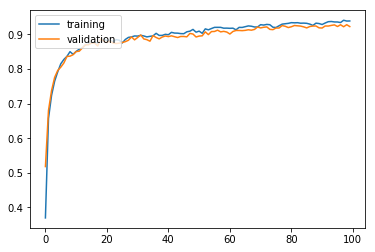

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

In [74]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 25us/step


In [75]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9128000140190125


## 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [0]:
from keras.layers import BatchNormalization

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

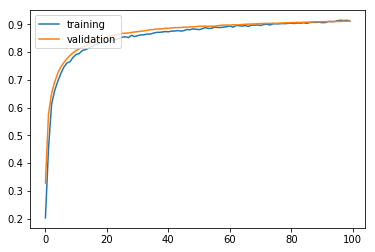

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [0]:
results = model.evaluate(X_test, y_test)

 9504/10000 [===========================>..] - ETA: 0s

In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9154


## 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

In [0]:
from keras.layers import Dropout

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

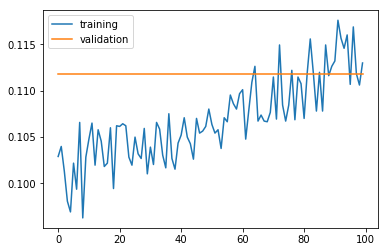

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [0]:
results = model.evaluate(X_test, y_test)

 9952/10000 [============================>.] - ETA: 0s

In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.1135


## 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRs1CBSEtpp5yj6SJ5K_nHd1FNfyEYa9KLjWfoMY_v7ARTq3tdpVw" style="width: 300px"/>

In [0]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [0]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)

In [0]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [0]:
ensemble_clf.fit(X_train, y_train)

In [0]:
y_pred = ensemble_clf.predict(X_test)

 9088/10000 [==========================>...] - ETA: 0s

In [0]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.3045


Slight boost in the test accuracy from the outset **(0.2144 => 0.3045)**

## Summary

|Model           | Naive Model | He normal  | Relu        | Adam        | Batchnorm  | Dropout   | Ensemble   |
|----------------|-------------|------------|-------------|-------------|------------|-----------|------------|
|Test Accuracy   | 0.2144      | 0.4105     | 0.9208      | 0.9248      | 0.9154     | 0.1135    | 0.3045     |

<br>
It turns out that most methods improve the model training & test performance.
Why don't try them out altogether?